In [2]:
import numpy as np
import sys
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import pandas as pd
import keras
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("./log.csv")

In [4]:
#x_data= df["Rtt","throughput"]
x_data = df[['rtt','throughput']]

y_data= df['service']


3000


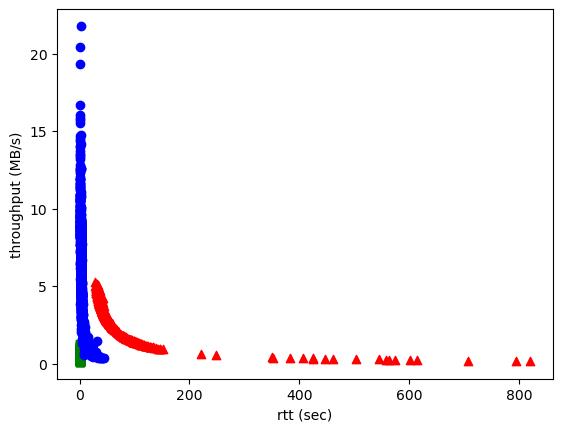

In [7]:
#plt.scatter(x_data[0][0],x_data[0][1], c='red' , marker='^')

print(len(y_data))
for i in range(0,len(y_data)):
    if(y_data[i] == 0):
        marker='^'
        color = 'red'
    elif(y_data[i] == 1):
        marker='o'
        color = 'blue'
    elif(y_data[i] == 2):
        marker='s'
        color = 'green'
    else:
        marker='*'
        color='orange'
        
        
    plt.scatter(x_data.iloc[i, 0], x_data.iloc[i, 1], c=color, marker= marker)

   
plt.xlabel("rtt (sec)")
plt.ylabel("throughput (MB/s)")    

plt.show()

In [8]:
groups = df.groupby('service')

# 학습 및 테스트 데이터를 저장할 빈 데이터프레임 생성
train_df = pd.DataFrame()
test_df = pd.DataFrame()

# 각 그룹(서비스 유형)에 대해 반복하며 데이터 분할
for _, group in groups:
    train, test = train_test_split(group, test_size=0.2, random_state=42)  
    train_df = pd.concat([train_df, train])
    test_df = pd.concat([test_df, test])

# 결과 확인
print(f'Total data: {len(df)}')
print(f'Training set size: {len(train_df)}')
print(f'Test set size: {len(test_df)}')



Total data: 3000
Training set size: 2400
Test set size: 600


In [9]:
x_train = train_df[['rtt','throughput']]
y_train = train_df['service'].values
x_test = test_df[['rtt','throughput']]
y_test = test_df['service'].values

x_train

,rtt,throughput
2018,50.424933,2.808988
2535,113.288194,1.257082
2695,40.223374,4.012979
2557,99.709138,1.377537
2836,42.174397,3.321818
...,...,...
106,0.065855,0.491468
270,0.001808,0.515206
861,0.036001,0.886154
435,0.001620,0.645740


In [10]:
Y_train = tf.keras.utils.to_categorical(y_train)
Y_test = tf.keras.utils.to_categorical(y_test)

In [11]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import TensorBoard

In [12]:
tf.random.set_seed(1)
tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)


model = Sequential()
model.add(Dense(16, input_dim=2, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.25))
model.add(Dense(128, activation='relu')) 
model.add(Dense(64, activation='relu')) 
model.add(keras.layers.Dropout(0.25))
model.add(Dense(32, activation='relu')) 
model.add(Dense(Y_train.shape[1], activation='softmax'))


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                48        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 dense_4 (Dense)             (None, 64)                8

2024-05-14 10:47:17.915174: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
history = model.fit(x_train, Y_train, validation_data=(x_test, Y_test), epochs=100, batch_size=128, callbacks=[tensorboard_callback])


Epoch 1/100
19/19 [==============================] - 1s 26ms/step - loss: 0.9760 - accuracy: 0.5288 - val_loss: 0.5580 - val_accuracy: 0.6333
Epoch 2/100
19/19 [==============================] - 0s 9ms/step - loss: 0.5806 - accuracy: 0.7308 - val_loss: 0.4628 - val_accuracy: 0.9133
Epoch 3/100
19/19 [==============================] - 0s 10ms/step - loss: 0.4594 - accuracy: 0.8925 - val_loss: 0.3772 - val_accuracy: 0.9567
Epoch 4/100
19/19 [==============================] - 0s 10ms/step - loss: 0.3700 - accuracy: 0.9492 - val_loss: 0.2744 - val_accuracy: 0.9633
Epoch 5/100
19/19 [==============================] - 0s 9ms/step - loss: 0.2540 - accuracy: 0.9588 - val_loss: 0.1393 - val_accuracy: 0.9700
Epoch 6/100
19/19 [==============================] - 0s 10ms/step - loss: 0.1378 - accuracy: 0.9638 - val_loss: 0.0750 - val_accuracy: 0.9733
Epoch 7/100
19/19 [==============================] - 0s 10ms/step - loss: 0.0994 - accuracy: 0.9688 - val_loss: 0.0651 - val_accuracy: 0.9733
Epoch 8/

19/19 [==============================] - 0s 11ms/step - loss: 0.0064 - accuracy: 0.9983 - val_loss: 0.0097 - val_accuracy: 1.0000
Epoch 59/100
19/19 [==============================] - 0s 10ms/step - loss: 0.0059 - accuracy: 0.9987 - val_loss: 0.0089 - val_accuracy: 1.0000
Epoch 60/100
19/19 [==============================] - 0s 9ms/step - loss: 0.0087 - accuracy: 0.9971 - val_loss: 4.5270e-04 - val_accuracy: 1.0000
Epoch 61/100
19/19 [==============================] - 0s 9ms/step - loss: 0.0066 - accuracy: 0.9983 - val_loss: 0.0501 - val_accuracy: 0.9667
Epoch 62/100
19/19 [==============================] - 0s 10ms/step - loss: 0.0077 - accuracy: 0.9967 - val_loss: 0.0209 - val_accuracy: 0.9967
Epoch 63/100
19/19 [==============================] - 0s 9ms/step - loss: 0.0048 - accuracy: 0.9992 - val_loss: 4.7959e-04 - val_accuracy: 1.0000
Epoch 64/100
19/19 [==============================] - 0s 9ms/step - loss: 0.0102 - accuracy: 0.9958 - val_loss: 3.0932e-04 - val_accuracy: 1.0000
Epoc

In [14]:
train_loss, train_accuracy = model.evaluate(x_train, Y_train, verbose=2)
print(f'Training loss: {train_loss}, Training accuracy: {train_accuracy}')

# 테스트 데이터에 대한 정확도와 손실값 확인
test_loss, test_accuracy = model.evaluate(x_test, Y_test, verbose=2)
print(f'Test loss: {test_loss}, Test accuracy: {test_accuracy}')

75/75 - 0s - loss: 0.0064 - accuracy: 1.0000 - 121ms/epoch - 2ms/step
Training loss: 0.006408318877220154, Training accuracy: 1.0
19/19 - 0s - loss: 0.0075 - accuracy: 1.0000 - 54ms/epoch - 3ms/step
Test loss: 0.007466141600161791, Test accuracy: 1.0


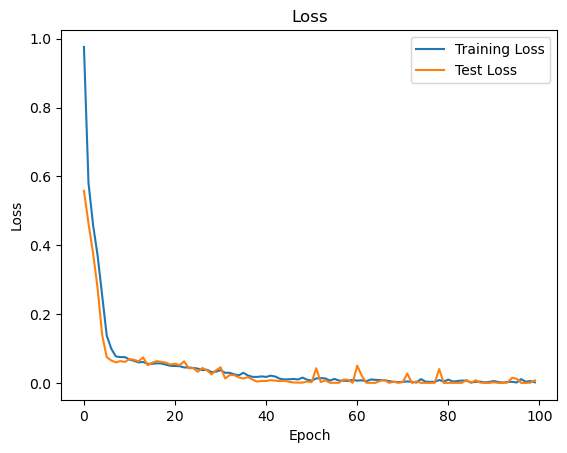

In [15]:


# 모델 학습 결과에서 손실값과 정확도 추출
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
test_loss = history.history['val_loss']
test_accuracy = history.history['val_accuracy']

# 손실값 그래프
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Test Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
model.save('model.h5')

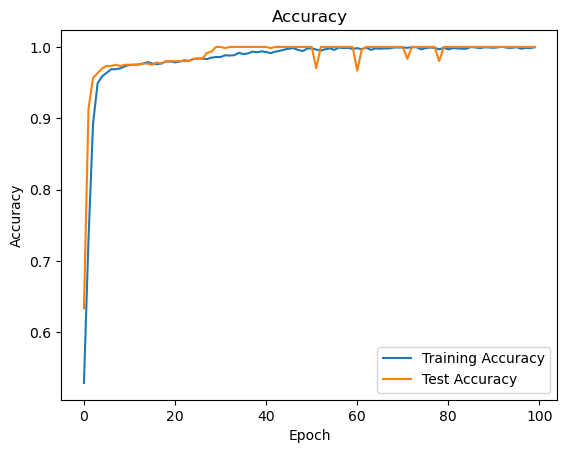

In [16]:
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(test_accuracy, label='Test Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
import numpy as np


y_pred = model.predict(x_test)

#  가장 높은 확률을 가진 클래스로 예측합니다
predicted_classes = np.argmax(y_pred, axis=1)

# 각 클래스별 정확도를 계산합니다.
class_accuracy = {}
for i in range(len(Y_test[0])):
    class_indices = np.where(Y_test[:, i] == 1)[0]
    correct_indices = np.where(predicted_classes[class_indices] == i)[0]
    class_accuracy[i] = len(correct_indices) / len(class_indices)

print("각 클래스별 정확도:", class_accuracy)

In [85]:
%load_ext tensorboard
%tensorboard --logdir=./logs